# Random Forest

In [1]:
### loading packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.inspection import permutation_importance
import shap
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler    
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report, confusion_matrix

## 1. Data import

In [2]:
train = pd.read_csv("/Volumes/ya22/projects/hda-22-23/live/TDS/Group6/training_clustered_new.csv")
train_kmeans = pd.read_csv("/Volumes/ya22/projects/hda-22-23/live/TDS/Group6/Data/training_clustered_new_kmeans.csv")
train["kmeans_cluster"] = train_kmeans["KMeans_cluster"]
train.head(10)

,WBC_count,red_blood_cell_count,haemoglobin_conc,platelet_count,lymphocyte_count,monocyte_count,neutrophil_count,eosinophil_count,basophil_count,nucleated_rbc_count,...,Alcohol_status,BMI,Smoke_pack_years,Sex,deprivation_score,Age_recr,case_status,type,cluster,kmeans_cluster
0,6.90,4.700,15.90,212.0,1.40,0.40,5.00,0.00,0.00,0.0,...,1,29.5254,41.250,1,16.9625,63.0,0.0,None,2,2
1,7.65,5.007,16.01,251.1,2.00,0.68,4.55,0.34,0.08,0.0,...,1,32.9796,18.000,1,3.0900,70.0,0.0,None,5,3
2,4.50,4.170,13.70,286.0,1.70,0.40,2.30,0.00,0.00,0.0,...,1,20.8999,28.750,0,7.1900,57.0,0.0,None,2,4
3,5.00,4.440,12.90,346.0,1.60,0.50,2.80,0.10,0.00,0.0,...,1,25.5132,63.750,0,6.3100,59.0,1.0,Lymphoma,2,4
4,7.73,4.305,14.18,408.3,2.72,0.67,4.15,0.17,0.03,0.0,...,1,24.4389,44.500,0,3.7900,58.0,0.0,None,3,1
5,5.60,4.320,14.10,173.0,1.10,0.30,4.10,0.00,0.10,0.0,...,1,23.6894,18.375,1,9.4976,69.0,0.0,None,1,0
6,6.44,3.900,12.04,201.5,1.69,0.39,3.82,0.50,0.04,0.0,...,3,28.4763,14.000,0,11.6800,66.0,0.0,None,5,1
7,8.10,4.380,13.91,315.1,1.74,0.83,5.36,0.11,0.07,0.0,...,1,28.2646,12.500,0,0.0000,67.0,0.0,None,5,0
8,8.10,4.920,14.20,212.0,2.60,0.50,4.60,0.30,0.00,0.0,...,1,30.4255,48.500,1,22.4000,60.0,1.0,Leukaemia,2,3
9,7.99,4.231,13.34,240.3,2.44,0.23,4.96,0.33,0.04,0.0,...,1,23.7037,16.250,0,19.4700,69.0,0.0,None,5,1


In [4]:
test = pd.read_csv("/Volumes/ya22/projects/hda-22-23/live/TDS/Group6/test_clustered_new.csv")
test_kmeans = pd.read_csv("/Volumes/ya22/projects/hda-22-23/live/TDS/Group6/Data/test_clustered_identical_train_kmeans.csv")
test["kmeans_cluster"] = test_kmeans["KMeans_cluster"]
test.head(10)

,Sex,Smoke_status,Alcohol_status,Smoke_pack_years,Ethnicity,BMI,WBC_count,red_blood_cell_count,haemoglobin_conc,platelet_count,...,nucleated_rbc_count,reticulocyte_count,mean_cell_volume,deprivation_score,Age_recr,case_status,type,row_index,cluster,kmeans_cluster
0,1,Previous,Current,NaN,British,27.6852,10.31,5.366,17.05,258.5,...,0.0,0.109,84.20,6.91000,65.0,0.0,NaN,NaN,5,3
1,0,Never,Current,NaN,British,22.4432,7.17,4.257,14.05,311.6,...,0.0,0.030,82.82,4.00000,67.0,0.0,NaN,NaN,3,1
2,1,Never,Never,NaN,Other,21.9651,7.68,5.127,15.96,179.2,...,0.0,0.044,83.67,0.00000,51.0,0.0,NaN,NaN,1,2
3,1,Never,Current,NaN,British,28.2011,5.70,4.470,13.80,342.0,...,0.0,0.069,84.60,31.14000,64.0,0.0,NaN,NaN,0,0
4,1,Never,Current,NaN,British,29.6816,8.28,4.232,13.61,243.2,...,0.0,0.107,82.75,4.46000,45.0,0.0,NaN,NaN,3,1
5,1,Never,Current,NaN,British,31.2795,5.54,4.949,14.40,252.9,...,0.0,0.079,78.52,11.81000,47.0,0.0,NaN,NaN,3,2
6,0,Previous,Current,6.0,British,25.5252,3.90,4.500,14.00,269.0,...,0.0,0.068,80.80,3.09913,65.0,0.0,NaN,NaN,2,4
7,1,Never,Current,NaN,British,18.4671,4.98,4.722,15.29,388.4,...,0.0,0.047,83.58,5.60000,66.0,0.0,NaN,NaN,5,2
8,1,Never,Current,NaN,Irish,26.8274,7.02,4.639,15.15,291.8,...,0.0,0.083,88.74,22.02000,50.0,0.0,NaN,NaN,3,2
9,0,Previous,Current,NaN,British,24.5723,6.30,4.410,13.20,361.0,...,0.0,0.047,85.40,3.90646,68.0,0.0,NaN,NaN,2,1


In [5]:
# Encoding categorical variables
test["case_status"] = test["case_status"].astype("int")
test['type'] = test['type'].replace(np.nan, "None")
ethnicity_dict = {"British" : 1, "Irish" : 2, "Other": 3, "Other White" : 4}
test=test.replace({"Ethnicity": ethnicity_dict})
smoke_dict = {"Current" : 1, "Never" : 2, "Previous": 3}
test=test.replace({"Smoke_status": smoke_dict})
alcohol_dict = {"Current" : 1, "Never" : 2, "Previous": 3}
test=test.replace({"Alcohol_status": alcohol_dict})
test['Smoke_pack_years'] = test['Smoke_pack_years'].replace(np.nan, 0)

In [6]:
train.shape

(15568, 24)

In [7]:
test.shape

(59820, 25)

In [8]:
# identify column that is in test but not in train
test.columns.difference(train.columns)

# drop row_index from test
test = test.drop(['row_index'], axis=1)

In [9]:
# Encoding case control status to 0 and 1
train["case_status"] = train["case_status"].astype("int")
train["case_status"]

0        0
1        0
2        0
3        1
4        0
        ..
15563    1
15564    0
15565    0
15566    1
15567    1
Name: case_status, Length: 15568, dtype: int64

In [10]:
train.head(20)

,WBC_count,red_blood_cell_count,haemoglobin_conc,platelet_count,lymphocyte_count,monocyte_count,neutrophil_count,eosinophil_count,basophil_count,nucleated_rbc_count,...,Alcohol_status,BMI,Smoke_pack_years,Sex,deprivation_score,Age_recr,case_status,type,cluster,kmeans_cluster
0,6.90,4.700,15.90,212.0,1.40,0.40,5.00,0.00,0.00,0.0,...,1,29.5254,41.250,1,16.9625,63.0,0,None,2,2
1,7.65,5.007,16.01,251.1,2.00,0.68,4.55,0.34,0.08,0.0,...,1,32.9796,18.000,1,3.0900,70.0,0,None,5,3
2,4.50,4.170,13.70,286.0,1.70,0.40,2.30,0.00,0.00,0.0,...,1,20.8999,28.750,0,7.1900,57.0,0,None,2,4
3,5.00,4.440,12.90,346.0,1.60,0.50,2.80,0.10,0.00,0.0,...,1,25.5132,63.750,0,6.3100,59.0,1,Lymphoma,2,4
4,7.73,4.305,14.18,408.3,2.72,0.67,4.15,0.17,0.03,0.0,...,1,24.4389,44.500,0,3.7900,58.0,0,None,3,1
5,5.60,4.320,14.10,173.0,1.10,0.30,4.10,0.00,0.10,0.0,...,1,23.6894,18.375,1,9.4976,69.0,0,None,1,0
6,6.44,3.900,12.04,201.5,1.69,0.39,3.82,0.50,0.04,0.0,...,3,28.4763,14.000,0,11.6800,66.0,0,None,5,1
7,8.10,4.380,13.91,315.1,1.74,0.83,5.36,0.11,0.07,0.0,...,1,28.2646,12.500,0,0.0000,67.0,0,None,5,0
8,8.10,4.920,14.20,212.0,2.60,0.50,4.60,0.30,0.00,0.0,...,1,30.4255,48.500,1,22.4000,60.0,1,Leukaemia,2,3
9,7.99,4.231,13.34,240.3,2.44,0.23,4.96,0.33,0.04,0.0,...,1,23.7037,16.250,0,19.4700,69.0,0,None,5,1


In [11]:
# for one-hot encoding (0: female, 1: male -> 1: female, 2: male)
train["Sex"] = train["Sex"] + 1
test["Sex"] = test["Sex"] + 1

In [12]:
# Convert categorical variable into dummy variables - one-hot encoding
train = pd.get_dummies(train, columns=['cluster', 'type', 'Ethnicity', 'Smoke_status', 'Alcohol_status', 'Sex', 'kmeans_cluster'])

test = pd.get_dummies(test, columns=['cluster', 'type', 'Ethnicity', 'Smoke_status', 'Alcohol_status', 'Sex', 'kmeans_cluster'])

In [13]:
# identify a target variable column
y_train_cc = train["case_status"]
y_train_subtype = train[[col for col in train.columns if col.startswith("type")]]

y_test_cc = test["case_status"]
y_test_subtype = test[[col for col in train.columns if col.startswith("type")]]

In [14]:
y_train_cc.shape

(15568,)

In [15]:
cols_to_drop = list(y_train_subtype.columns) + ["case_status"]
train.drop(cols_to_drop, axis=1, inplace=True)

test.drop(cols_to_drop, axis=1, inplace=True)

In [16]:
# split train data into train and validation
X_train, X_val, y_train, y_val = train_test_split(train, y_train_cc, test_size=0.3, random_state=42)

## 2. Data modelling

### 1. Covariates (Baseline model)

In [17]:
train_1 = X_train[["BMI", "Smoke_pack_years", "Sex_1", "Sex_2", "deprivation_score", "Age_recr", "Ethnicity_1", "Ethnicity_2", "Ethnicity_3", "Ethnicity_4", "Smoke_status_1", "Smoke_status_2",
                 "Smoke_status_3", "Alcohol_status_1", "Alcohol_status_2", "Alcohol_status_3"]]

val_1 = X_val[["BMI", "Smoke_pack_years", "Sex_1", "Sex_2", "deprivation_score", "Age_recr", "Ethnicity_1", "Ethnicity_2", "Ethnicity_3", "Ethnicity_4", "Smoke_status_1", "Smoke_status_2",
                 "Smoke_status_3", "Alcohol_status_1", "Alcohol_status_2", "Alcohol_status_3"]]

test_1 = test[["BMI", "Smoke_pack_years", "Sex_1", "Sex_2", "deprivation_score", "Age_recr", "Ethnicity_1", "Ethnicity_2", "Ethnicity_3", "Ethnicity_4", "Smoke_status_1", "Smoke_status_2",
                 "Smoke_status_3", "Alcohol_status_1", "Alcohol_status_2", "Alcohol_status_3"]]

In [18]:
scaler = StandardScaler()
scaler.fit(train_1[['BMI','Smoke_pack_years', 'deprivation_score', 'Age_recr']])

train_1[['BMI', 'Smoke_pack_years', 'deprivation_score', 'Age_recr']] = scaler.transform(train_1[['BMI', 'Smoke_pack_years', 'deprivation_score', 'Age_recr']])
val_1[['BMI', 'Smoke_pack_years', 'deprivation_score', 'Age_recr']] = scaler.transform(val_1[['BMI', 'Smoke_pack_years', 'deprivation_score', 'Age_recr']])
test_1[['BMI', 'Smoke_pack_years', 'deprivation_score', 'Age_recr']] = scaler.transform(test_1[['BMI', 'Smoke_pack_years', 'deprivation_score', 'Age_recr']])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Fitting 5 folds for each of 100 candidates, totalling 500 fits
--------------------Random Forest Model---------------------
Validation set
The accuracy of a random forest model is: 0.5174480839220723
The f1 score of a random forest model is: 0.31738340399757725
The precision score of a random forest model is: 0.24349442379182157
The recall score of a random forest model is: 0.45565217391304347
              precision    recall  f1-score   support

           0       0.75      0.54      0.63      3521
           1       0.24      0.46      0.32      1150

    accuracy                           0.52      4671
   macro avg       0.50      0.50      0.47      4671
weighted avg       0.63      0.52      0.55      4671

Test set
The accuracy of a random forest model is: 0.34445001671681713
The f1 score of a random forest model is: 0.035040232289180344
The precision score of a random forest model is: 0.018027598430181035
The recall score of a random forest model is: 0.6223776223776224
       

<AxesSubplot:>

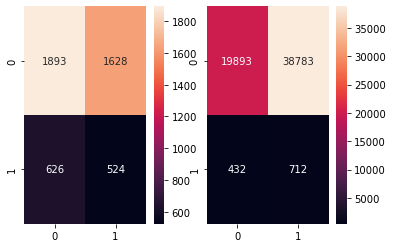

In [19]:
## Random forest model with gridsearch cross validation
parameters = {'max_features':['sqrt', 'log2'], 'n_estimators':[25,50,100,250,500],
              'max_depth':range(1,8),'min_samples_leaf':range(1,11), 'min_samples_split':range(2,11), 'criterion' :['gini', 'entropy']}


kf = StratifiedKFold(n_splits=5, shuffle=True)
rf_class = RandomizedSearchCV(RandomForestClassifier(class_weight="balanced"), param_distributions=parameters, n_iter=100, cv=kf, scoring="f1", random_state=100, verbose=1)
rf_class.fit(X=train_1, y=y_train)

# to see best parameters
rf_class.best_params_

# to make new classifier with the best estimator
best_random_grid=rf_class.best_estimator_

rf_model_1 = rf_class.best_estimator_

y_pred_val_1 = rf_model_1.predict(val_1)
print("--------------------Random Forest Model---------------------")
print("Validation set")
print("The accuracy of a random forest model is: {}".format(accuracy_score(y_val, y_pred_val_1)))
print("The f1 score of a random forest model is: {}".format(f1_score(y_val, y_pred_val_1)))
print("The precision score of a random forest model is: {}".format(precision_score(y_val, y_pred_val_1)))
print("The recall score of a random forest model is: {}".format(recall_score(y_val, y_pred_val_1)))
print(classification_report(y_val, y_pred_val_1))

fig, axs = plt.subplots(ncols=2)
cm = confusion_matrix(y_val, y_pred_val_1)
sns.heatmap(cm, annot=True, fmt='d', ax=axs[0])

y_pred_1 = rf_model_1.predict(test_1)
print("Test set")
print("The accuracy of a random forest model is: {}".format(accuracy_score(y_test_cc, y_pred_1)))
print("The f1 score of a random forest model is: {}".format(f1_score(y_test_cc, y_pred_1)))
print("The precision score of a random forest model is: {}".format(precision_score(y_test_cc, y_pred_1)))
print("The recall score of a random forest model is: {}".format(recall_score(y_test_cc, y_pred_1)))
print(classification_report(y_test_cc,y_pred_1))

cm = confusion_matrix(y_test_cc, y_pred_1)
sns.heatmap(cm, annot=True, fmt='d', ax=axs[1])

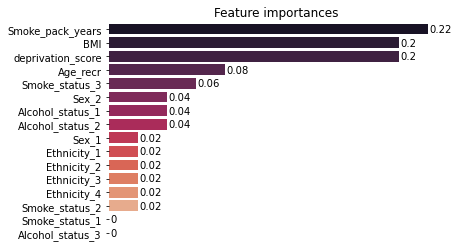

In [20]:
# Organizing feature names and importances in a DataFrame
features_df = pd.DataFrame({'features': rf_model_1.feature_names_in_, 'importances': rf_model_1.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

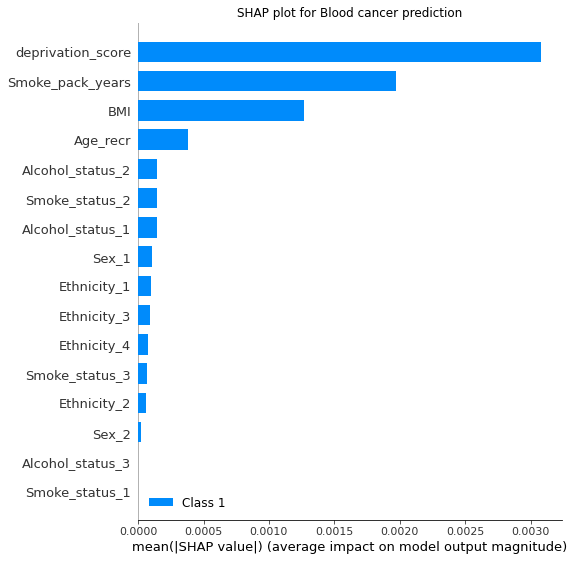

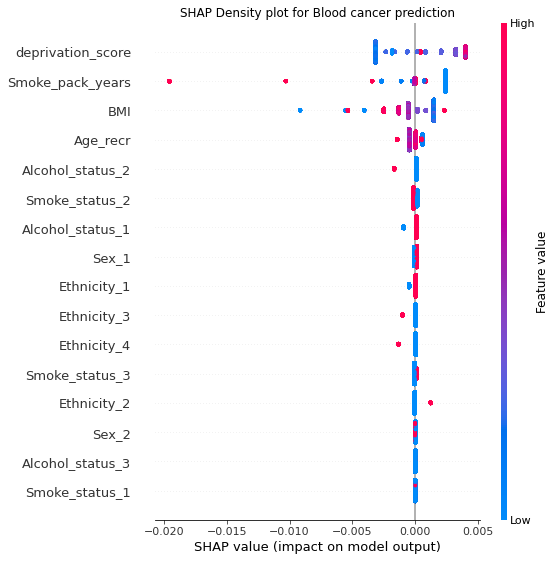

In [21]:
explainer = shap.TreeExplainer(rf_model_1)
shap_values = explainer.shap_values(test_1)

plt.title('SHAP plot for Blood cancer prediction')
shap.summary_plot(shap_values, features = test_1, class_inds = [1])
plt.show()

plt.title('SHAP Density plot for Blood cancer prediction')
shap.summary_plot(shap_values[1], features = test_1)
plt.show()


In [22]:
print(classification_report(y_val, y_pred_val_1))

              precision    recall  f1-score   support

           0       0.75      0.54      0.63      3521
           1       0.24      0.46      0.32      1150

    accuracy                           0.52      4671
   macro avg       0.50      0.50      0.47      4671
weighted avg       0.63      0.52      0.55      4671



In [23]:
print(classification_report(y_test_cc, y_pred_1))

              precision    recall  f1-score   support

           0       0.98      0.34      0.50     58676
           1       0.02      0.62      0.04      1144

    accuracy                           0.34     59820
   macro avg       0.50      0.48      0.27     59820
weighted avg       0.96      0.34      0.49     59820



### 2. Covariates and Blood counts

In [24]:
train_2 = X_train[["WBC_count", "red_blood_cell_count", 'haemoglobin_conc',
       'platelet_count', 'lymphocyte_count', 'monocyte_count',
       'neutrophil_count', 'eosinophil_count', 'basophil_count',
       'nucleated_rbc_count', 'reticulocyte_count', 'mean_cell_volume',
       'Smoke_status_1', 'Smoke_status_2', 'Smoke_status_3', 'Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3', 'Ethnicity_4', 'Alcohol_status_1', 'Alcohol_status_2', 'Alcohol_status_3', 'BMI',
       'Smoke_pack_years', 'Sex_1', 'Sex_2', 'deprivation_score', 'Age_recr']]

val_2 = X_val[["WBC_count", "red_blood_cell_count", 'haemoglobin_conc',
       'platelet_count', 'lymphocyte_count', 'monocyte_count',
       'neutrophil_count', 'eosinophil_count', 'basophil_count',
       'nucleated_rbc_count', 'reticulocyte_count', 'mean_cell_volume',
       'Smoke_status_1', 'Smoke_status_2', 'Smoke_status_3', 'Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3', 'Ethnicity_4', 'Alcohol_status_1', 'Alcohol_status_2', 'Alcohol_status_3', 'BMI',
       'Smoke_pack_years', 'Sex_1', 'Sex_2', 'deprivation_score', 'Age_recr']]

test_2 = test[["WBC_count", "red_blood_cell_count", 'haemoglobin_conc',
       'platelet_count', 'lymphocyte_count', 'monocyte_count',
       'neutrophil_count', 'eosinophil_count', 'basophil_count',
       'nucleated_rbc_count', 'reticulocyte_count', 'mean_cell_volume',
       'Smoke_status_1', 'Smoke_status_2', 'Smoke_status_3', 'Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3', 'Ethnicity_4', 'Alcohol_status_1', 'Alcohol_status_2', 'Alcohol_status_3', 'BMI',
       'Smoke_pack_years', 'Sex_1', 'Sex_2', 'deprivation_score', 'Age_recr']]

In [25]:
scaler = StandardScaler()
scaler.fit(train_2[['WBC_count', 'red_blood_cell_count', 'haemoglobin_conc',
       'platelet_count', 'lymphocyte_count', 'monocyte_count',
       'neutrophil_count', 'eosinophil_count', 'basophil_count',
       'nucleated_rbc_count', 'reticulocyte_count', 'mean_cell_volume', 'BMI',
       'Smoke_pack_years', 'deprivation_score', 'Age_recr']])

train_2[['WBC_count', 'red_blood_cell_count', 'haemoglobin_conc',
       'platelet_count', 'lymphocyte_count', 'monocyte_count',
       'neutrophil_count', 'eosinophil_count', 'basophil_count',
       'nucleated_rbc_count', 'reticulocyte_count', 'mean_cell_volume', 'BMI',
       'Smoke_pack_years', 'deprivation_score', 'Age_recr']] = scaler.transform(train_2[['WBC_count', 'red_blood_cell_count', 'haemoglobin_conc',
       'platelet_count', 'lymphocyte_count', 'monocyte_count',
       'neutrophil_count', 'eosinophil_count', 'basophil_count',
       'nucleated_rbc_count', 'reticulocyte_count', 'mean_cell_volume', 'BMI',
       'Smoke_pack_years', 'deprivation_score', 'Age_recr']]
       )
val_2[['WBC_count', 'red_blood_cell_count', 'haemoglobin_conc',
       'platelet_count', 'lymphocyte_count', 'monocyte_count',
       'neutrophil_count', 'eosinophil_count', 'basophil_count',
       'nucleated_rbc_count', 'reticulocyte_count', 'mean_cell_volume', 'BMI',
       'Smoke_pack_years', 'deprivation_score', 'Age_recr']] = scaler.transform(val_2[['WBC_count', 'red_blood_cell_count', 'haemoglobin_conc',
       'platelet_count', 'lymphocyte_count', 'monocyte_count',
       'neutrophil_count', 'eosinophil_count', 'basophil_count',
       'nucleated_rbc_count', 'reticulocyte_count', 'mean_cell_volume', 'BMI',
       'Smoke_pack_years', 'deprivation_score', 'Age_recr']] 
       )

test_2[['WBC_count', 'red_blood_cell_count', 'haemoglobin_conc',
       'platelet_count', 'lymphocyte_count', 'monocyte_count',
       'neutrophil_count', 'eosinophil_count', 'basophil_count',
       'nucleated_rbc_count', 'reticulocyte_count', 'mean_cell_volume', 'BMI',
       'Smoke_pack_years', 'deprivation_score', 'Age_recr']] = scaler.transform(test_2[['WBC_count', 'red_blood_cell_count', 'haemoglobin_conc',
       'platelet_count', 'lymphocyte_count', 'monocyte_count',
       'neutrophil_count', 'eosinophil_count', 'basophil_count',
       'nucleated_rbc_count', 'reticulocyte_count', 'mean_cell_volume', 'BMI',
       'Smoke_pack_years', 'deprivation_score', 'Age_recr']])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Fitting 5 folds for each of 100 candidates, totalling 500 fits
--------------------Random Forest Model---------------------
Validation set
The accuracy of a random forest model is: 0.6317704988225219
The f1 score of a random forest model is: 0.34749620637329287
The precision score of a random forest model is: 0.3082099596231494
The recall score of a random forest model is: 0.3982608695652174
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      3521
           1       0.31      0.40      0.35      1150

    accuracy                           0.63      4671
   macro avg       0.55      0.55      0.55      4671
weighted avg       0.67      0.63      0.65      4671

Test set
The accuracy of a random forest model is: 0.6480441323971916
The f1 score of a random forest model is: 0.05187787084571738
The precision score of a random forest model is: 0.027347830215554078
The recall score of a random forest model is: 0.5034965034965035
           

<AxesSubplot:>

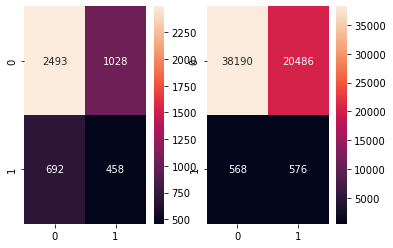

In [26]:
## Random forest model with randomizedsearch cross validation
parameters = {'max_features':['sqrt', 'log2'], 'n_estimators':[25,50,100,250,500],
              'max_depth':range(1,8),'min_samples_leaf':range(1,11), 'min_samples_split':range(2,11), 'criterion' :['gini', 'entropy']}


kf = StratifiedKFold(n_splits=5, shuffle=True)
rf_class_2 = RandomizedSearchCV(RandomForestClassifier(class_weight="balanced"), param_distributions=parameters, n_iter=100, cv=kf, scoring="f1", random_state=100, verbose=1)
rf_class_2.fit(X=train_2, y=y_train)

# to see best parameters
rf_class_2.best_params_

# to make new classifier with the best estimator
best_random_grid=rf_class_2.best_estimator_

rf_model_2 = rf_class_2.best_estimator_

y_pred_val_2 = rf_model_2.predict(val_2)
print("--------------------Random Forest Model---------------------")
print("Validation set")
print("The accuracy of a random forest model is: {}".format(accuracy_score(y_val, y_pred_val_2)))
print("The f1 score of a random forest model is: {}".format(f1_score(y_val, y_pred_val_2)))
print("The precision score of a random forest model is: {}".format(precision_score(y_val, y_pred_val_2)))
print("The recall score of a random forest model is: {}".format(recall_score(y_val, y_pred_val_2)))
print(classification_report(y_val, y_pred_val_2))

fig, axs = plt.subplots(ncols=2)
cm = confusion_matrix(y_val, y_pred_val_2)
sns.heatmap(cm, annot=True, fmt='d', ax=axs[0])

y_pred_2 = rf_model_2.predict(test_2)
print("Test set")
print("The accuracy of a random forest model is: {}".format(accuracy_score(y_test_cc, y_pred_2)))
print("The f1 score of a random forest model is: {}".format(f1_score(y_test_cc, y_pred_2)))
print("The precision score of a random forest model is: {}".format(precision_score(y_test_cc, y_pred_2)))
print("The recall score of a random forest model is: {}".format(recall_score(y_test_cc, y_pred_2)))
print(classification_report(y_test_cc,y_pred_2))

cm = confusion_matrix(y_test_cc, y_pred_2)
sns.heatmap(cm, annot=True, fmt='d', ax=axs[1])

In [80]:
print(rf_model_2)

RandomForestClassifier(class_weight='balanced', max_depth=1,
                       max_features='log2', min_samples_leaf=8,
                       min_samples_split=10, n_estimators=50)


In [43]:
print(len(y_val), len(y_pred_val_2))

4671 4671


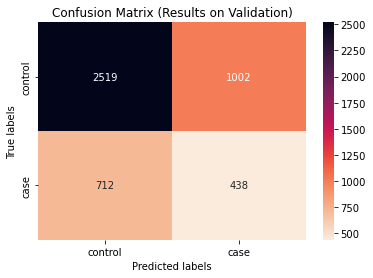

In [53]:
labels = ['case', 'control']
cm = confusion_matrix(y_val, y_pred_val_2)

my_cmap = sns.cm.rocket_r
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap=my_cmap)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix (Results on Validation)')
ax.xaxis.set_ticklabels(['control', 'case']) 
ax.yaxis.set_ticklabels(['control', 'case'])

plt.show()

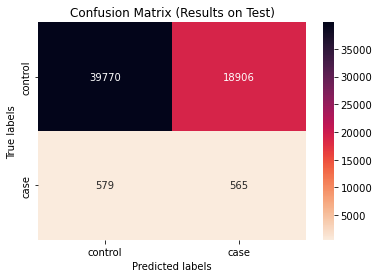

In [54]:
labels = ['case', 'control']
cm = confusion_matrix(y_test_cc, y_pred_2)


my_cmap = sns.cm.rocket_r
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap=my_cmap)
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix (Results on Test)')
ax.xaxis.set_ticklabels(['control', 'case']) 
ax.yaxis.set_ticklabels(['control', 'case'])

plt.show()

<AxesSubplot:>

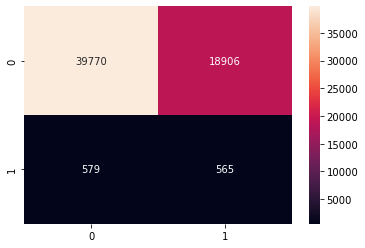

In [39]:
cm = confusion_matrix(y_test_cc, y_pred_2)
sns.heatmap(cm, annot=True, fmt='d')

In [58]:
list(test_2.columns)

['WBC_count',
 'red_blood_cell_count',
 'haemoglobin_conc',
 'platelet_count',
 'lymphocyte_count',
 'monocyte_count',
 'neutrophil_count',
 'eosinophil_count',
 'basophil_count',
 'nucleated_rbc_count',
 'reticulocyte_count',
 'mean_cell_volume',
 'Smoke_status_1',
 'Smoke_status_2',
 'Smoke_status_3',
 'Ethnicity_1',
 'Ethnicity_2',
 'Ethnicity_3',
 'Ethnicity_4',
 'Alcohol_status_1',
 'Alcohol_status_2',
 'Alcohol_status_3',
 'BMI',
 'Smoke_pack_years',
 'Sex_1',
 'Sex_2',
 'deprivation_score',
 'Age_recr']

In [ ]:
# Encoding categorical variables
test["case_status"] = test["case_status"].astype("int")
test['type'] = test['type'].replace(np.nan, "None")
ethnicity_dict = {"British" : 1, "Irish" : 2, "Other": 3, "Other White" : 4}
test=test.replace({"Ethnicity": ethnicity_dict})
smoke_dict = {"Current" : 1, "Never" : 2, "Previous": 3}
test=test.replace({"Smoke_status": smoke_dict})
alcohol_dict = {"Current" : 1, "Never" : 2, "Previous": 3}
test=test.replace({"Alcohol_status": alcohol_dict})
test['Smoke_pack_years'] = test['Smoke_pack_years'].replace(np.nan, 0)

In [72]:
feature_names = ["White blood cell count", "Red blood cell count", "Haemoglobin concentration", "Platelet count", "Lymphocyte count", "Monocyte count", "Neutrophil count", "Eosiophil count", "Basophil count", "Nucleated RBC count", "Reticulocyte count", "Mean cell volume", "Current smoker", "Never smoker", "Previous smoker", "British", "Irish", "Other", "Other White", "Current drinker", "Never drinker", "Previous drinker", "BMI", "Smoke pack years", "Female", "Male" , "Deprivation score", "Age at recruitment"]

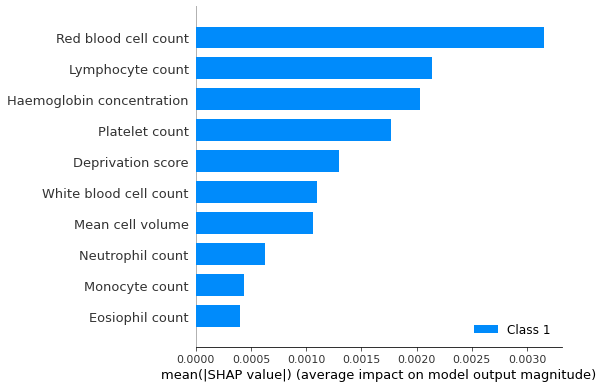

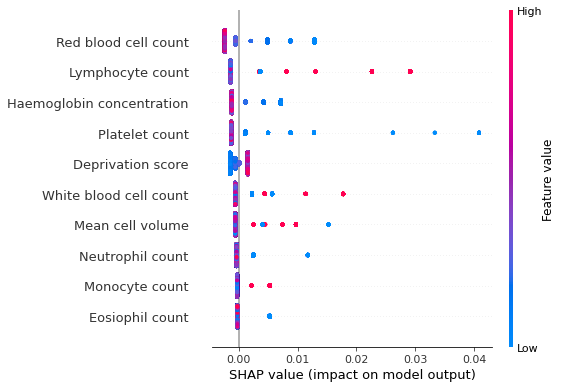

In [73]:
explainer = shap.TreeExplainer(rf_model_2)
shap_values = explainer.shap_values(test_2)


shap.summary_plot(shap_values, features = test_2, class_inds = [1], feature_names = feature_names, plot_type = "bar", max_display=10)
plt.show()

shap.summary_plot(shap_values[1], features = test_2, feature_names=feature_names, max_display=10)
plt.show()


### 3. Covariates and GMM clusters

In [26]:
train_3 = X_train[["BMI", "Smoke_pack_years", "Sex_1", "Sex_2", "deprivation_score", "Age_recr", "Ethnicity_1", "Ethnicity_2", "Ethnicity_3", "Ethnicity_4", "Smoke_status_1", "Smoke_status_2",
                 "Smoke_status_3", "Alcohol_status_1", "Alcohol_status_2", "Alcohol_status_3", "cluster_0", "cluster_1", "cluster_2", "cluster_3", "cluster_4", "cluster_5",]]
val_3 = X_val[["BMI", "Smoke_pack_years", "Sex_1", "Sex_2", "deprivation_score", "Age_recr", "Ethnicity_1", "Ethnicity_2", "Ethnicity_3", "Ethnicity_4", "Smoke_status_1", "Smoke_status_2",
                 "Smoke_status_3", "Alcohol_status_1", "Alcohol_status_2", "Alcohol_status_3", "cluster_0", "cluster_1", "cluster_2", "cluster_3", "cluster_4", "cluster_5"]]
test_3 = test[["BMI", "Smoke_pack_years", "Sex_1", "Sex_2", "deprivation_score", "Age_recr", "Ethnicity_1", "Ethnicity_2", "Ethnicity_3", "Ethnicity_4", "Smoke_status_1", "Smoke_status_2",
                 "Smoke_status_3", "Alcohol_status_1", "Alcohol_status_2", "Alcohol_status_3", "cluster_0", "cluster_1", "cluster_2", "cluster_3", "cluster_4", "cluster_5"]]

In [27]:
scaler = StandardScaler()
scaler.fit(train_3[['BMI','Smoke_pack_years', 'deprivation_score', 'Age_recr']])
train_3[['BMI','Smoke_pack_years', 'deprivation_score', 'Age_recr']] = scaler.transform(train_3[['BMI', 'Smoke_pack_years', 'deprivation_score', 'Age_recr']])
val_3[['BMI','Smoke_pack_years', 'deprivation_score', 'Age_recr']] = scaler.transform(val_3[['BMI', 'Smoke_pack_years', 'deprivation_score', 'Age_recr']])
test_3[['BMI', 'Smoke_pack_years', 'deprivation_score', 'Age_recr']] = scaler.transform(test_3[['BMI', 'Smoke_pack_years', 'deprivation_score', 'Age_recr']])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Fitting 5 folds for each of 100 candidates, totalling 500 fits
--------------------Random Forest Model---------------------
Validation set
The accuracy of a random forest model is: 0.48190965532005997
The f1 score of a random forest model is: 0.34417344173441733
The precision score of a random forest model is: 0.25
The recall score of a random forest model is: 0.5521739130434783
              precision    recall  f1-score   support

           0       0.76      0.46      0.57      3521
           1       0.25      0.55      0.34      1150

    accuracy                           0.48      4671
   macro avg       0.50      0.51      0.46      4671
weighted avg       0.63      0.48      0.52      4671

Test set
The accuracy of a random forest model is: 0.5124540287529255
The f1 score of a random forest model is: 0.04172827336947593
The precision score of a random forest model is: 0.021679014031613805
The recall score of a random forest model is: 0.5550699300699301
              precision 

<AxesSubplot:>

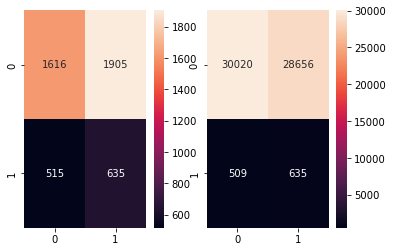

In [28]:
## Random forest model with randomizedsearch cross validation
parameters = {'max_features':['sqrt', 'log2'], 'n_estimators':[25,50,100,250,500],
              'max_depth':range(1,8),'min_samples_leaf':range(1,11), 'min_samples_split':range(2,11), 'criterion' :['gini', 'entropy']}


kf = StratifiedKFold(n_splits=5, shuffle=True)
rf_class_3 = RandomizedSearchCV(RandomForestClassifier(class_weight="balanced"), param_distributions=parameters, n_iter=100, cv=kf, scoring="f1", random_state=100, verbose=1)
rf_class_3.fit(X=train_3, y=y_train)

# to see best parameters
rf_class_3.best_params_

# to make new classifier with the best estimator
rf_model_3 = rf_class_3.best_estimator_

y_pred_val_3 = rf_model_3.predict(val_3)
print("--------------------Random Forest Model---------------------")
print("Validation set")
print("The accuracy of a random forest model is: {}".format(accuracy_score(y_val, y_pred_val_3)))
print("The f1 score of a random forest model is: {}".format(f1_score(y_val, y_pred_val_3)))
print("The precision score of a random forest model is: {}".format(precision_score(y_val, y_pred_val_3)))
print("The recall score of a random forest model is: {}".format(recall_score(y_val, y_pred_val_3)))
print(classification_report(y_val, y_pred_val_3))

fig, axs = plt.subplots(ncols=2)
cm = confusion_matrix(y_val, y_pred_val_3)
sns.heatmap(cm, annot=True, fmt='d', ax=axs[0])

y_pred_3 = rf_model_3.predict(test_3)
print("Test set")
print("The accuracy of a random forest model is: {}".format(accuracy_score(y_test_cc, y_pred_3)))
print("The f1 score of a random forest model is: {}".format(f1_score(y_test_cc, y_pred_3)))
print("The precision score of a random forest model is: {}".format(precision_score(y_test_cc, y_pred_3)))
print("The recall score of a random forest model is: {}".format(recall_score(y_test_cc, y_pred_3)))
print(classification_report(y_test_cc,y_pred_3))

cm = confusion_matrix(y_test_cc, y_pred_3)
sns.heatmap(cm, annot=True, fmt='d', ax=axs[1])

### 4. Covariates and K-means clusters

In [29]:
train_4 = X_train[["BMI", "Smoke_pack_years", "Sex_1", "Sex_2", "deprivation_score", "Age_recr", "Ethnicity_1", "Ethnicity_2", "Ethnicity_3", "Ethnicity_4", "Smoke_status_1", "Smoke_status_2",
                 "Smoke_status_3", "Alcohol_status_1", "Alcohol_status_2", "Alcohol_status_3", "kmeans_cluster_0", "kmeans_cluster_1", "kmeans_cluster_2", "kmeans_cluster_3", "kmeans_cluster_4", "kmeans_cluster_5"]]
val_4 = X_val[["BMI", "Smoke_pack_years", "Sex_1", "Sex_2", "deprivation_score", "Age_recr", "Ethnicity_1", "Ethnicity_2", "Ethnicity_3", "Ethnicity_4", "Smoke_status_1", "Smoke_status_2",
                 "Smoke_status_3", "Alcohol_status_1", "Alcohol_status_2", "Alcohol_status_3", "kmeans_cluster_0", "kmeans_cluster_1", "kmeans_cluster_2", "kmeans_cluster_3", "kmeans_cluster_4", "kmeans_cluster_5"]]
test_4 = test[["BMI", "Smoke_pack_years", "Sex_1", "Sex_2", "deprivation_score", "Age_recr", "Ethnicity_1", "Ethnicity_2", "Ethnicity_3", "Ethnicity_4", "Smoke_status_1", "Smoke_status_2",
                 "Smoke_status_3", "Alcohol_status_1", "Alcohol_status_2", "Alcohol_status_3", "kmeans_cluster_0", "kmeans_cluster_1", "kmeans_cluster_2", "kmeans_cluster_3", "kmeans_cluster_4", "kmeans_cluster_5"]]

In [30]:
scaler = StandardScaler()
scaler.fit(train_4[['BMI','Smoke_pack_years', 'deprivation_score', 'Age_recr']])
train_3[['BMI','Smoke_pack_years', 'deprivation_score', 'Age_recr']] = scaler.transform(train_4[['BMI', 'Smoke_pack_years', 'deprivation_score', 'Age_recr']])
val_3[['BMI','Smoke_pack_years', 'deprivation_score', 'Age_recr']] = scaler.transform(val_4[['BMI', 'Smoke_pack_years', 'deprivation_score', 'Age_recr']])
test_3[['BMI', 'Smoke_pack_years', 'deprivation_score', 'Age_recr']] = scaler.transform(test_4[['BMI', 'Smoke_pack_years', 'deprivation_score', 'Age_recr']])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Fitting 5 folds for each of 100 candidates, totalling 500 fits
--------------------Random Forest Model---------------------
Validation set
The accuracy of a random forest model is: 0.47848426461143223
The f1 score of a random forest model is: 0.3705426356589147
The precision score of a random forest model is: 0.2636029411764706
The recall score of a random forest model is: 0.6234782608695653
              precision    recall  f1-score   support

           0       0.78      0.43      0.55      3521
           1       0.26      0.62      0.37      1150

    accuracy                           0.48      4671
   macro avg       0.52      0.53      0.46      4671
weighted avg       0.65      0.48      0.51      4671

Test set
The accuracy of a random forest model is: 0.437913741223671
The f1 score of a random forest model is: 0.03727881807249614
The precision score of a random forest model is: 0.019270617488603398
The recall score of a random forest model is: 0.5690559440559441
            

<AxesSubplot:>

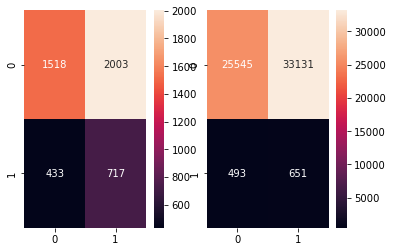

In [31]:
## Random forest model with randomizedsearch cross validation
parameters = {'max_features':['sqrt', 'log2'], 'n_estimators':[25,50,100,250,500],
              'max_depth':range(1,8),'min_samples_leaf':range(1,11), 'min_samples_split':range(2,11), 'criterion' :['gini', 'entropy']}


kf = StratifiedKFold(n_splits=5, shuffle=True)
rf_class_4 = RandomizedSearchCV(RandomForestClassifier(class_weight="balanced"), param_distributions=parameters, n_iter=100, cv=kf, scoring="f1", random_state=100, verbose=1)
rf_class_4.fit(X=train_4, y=y_train)

# to see best parameters
rf_class_4.best_params_

# to make new classifier with the best estimator
rf_model_4 = rf_class_4.best_estimator_

y_pred_val_4 = rf_model_4.predict(val_4)
print("--------------------Random Forest Model---------------------")
print("Validation set")
print("The accuracy of a random forest model is: {}".format(accuracy_score(y_val, y_pred_val_4)))
print("The f1 score of a random forest model is: {}".format(f1_score(y_val, y_pred_val_4)))
print("The precision score of a random forest model is: {}".format(precision_score(y_val, y_pred_val_4)))
print("The recall score of a random forest model is: {}".format(recall_score(y_val, y_pred_val_4)))
print(classification_report(y_val, y_pred_val_4))

fig, axs = plt.subplots(ncols=2)
cm = confusion_matrix(y_val, y_pred_val_4)
sns.heatmap(cm, annot=True, fmt='d', ax=axs[0])

y_pred_4 = rf_model_4.predict(test_4)
print("Test set")
print("The accuracy of a random forest model is: {}".format(accuracy_score(y_test_cc, y_pred_4)))
print("The f1 score of a random forest model is: {}".format(f1_score(y_test_cc, y_pred_4)))
print("The precision score of a random forest model is: {}".format(precision_score(y_test_cc, y_pred_4)))
print("The recall score of a random forest model is: {}".format(recall_score(y_test_cc, y_pred_4)))
print(classification_report(y_test_cc,y_pred_4))

cm = confusion_matrix(y_test_cc, y_pred_4)
sns.heatmap(cm, annot=True, fmt='d', ax=axs[1])

In [53]:
print("The accuracy of a random forest model is: {}".format(accuracy_score(y_test_cc, y_pred)))
print("The f1 score of a random forest model is: {}".format(f1_score(y_test_cc, y_pred)))
print("The precision score of a random forest model is: {}".format(precision_score(y_test_cc, y_pred)))
print("The recall score of a random forest model is: {}".format(recall_score(y_test_cc, y_pred)))

The accuracy of a random forest model is: 0.970193915078569
The f1 score of a random forest model is: 0.1489260143198091
The precision score of a random forest model is: 0.1640378548895899
The recall score of a random forest model is: 0.13636363636363635
